## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.image as mpimg
import splitfolders
from  matplotlib import pyplot as plt

## Initializing Data Paths

In [2]:
input_data_path ='/home/nevillemthw/AI_Final/Stenosis detection/input/stenosis/'

split_data_path = '/home/nevillemthw/AI_Final/Stenosis detection/input/'

output_train_data_path = '/home/nevillemthw/AI_Final/output/train/stenosis/'

output_test_data_path = '/home/nevillemthw/AI_Final/output/test/stenosis/'

output_val_data_path = '/home/nevillemthw/AI_Final/output/val/stenosis/'

train_labels = '/home/nevillemthw/AI_Final/Stenosis detection/train_labels.csv'

test_labels = '/home/nevillemthw/AI_Final/Stenosis detection/test_labels.csv'

In [3]:
# Read training labels
train_labels_df = pd.read_csv(train_labels)
print(train_labels_df.head())
train_labels_df.info()

            filename  width  height     class  xmin  ymin  xmax  ymax
0  14_024_2_0042.bmp    800     800  Stenosis   235   156   282   192
1  14_031_4_0031.bmp    800     800  Stenosis   419   319   446   349
2  14_046_5_0066.bmp   1000    1000  Stenosis   679   307   699   336
3  14_010_6_0035.bmp    512     512  Stenosis    94   244   126   286
4  14_014_1_0015.bmp    512     512  Stenosis   163   118   203   151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7493 non-null   object
 1   width     7493 non-null   int64 
 2   height    7493 non-null   int64 
 3   class     7493 non-null   object
 4   xmin      7493 non-null   int64 
 5   ymin      7493 non-null   int64 
 6   xmax      7493 non-null   int64 
 7   ymax      7493 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 468.4+ KB


In [4]:
# Read test labels
test_labels_df = pd.read_csv(test_labels)
print(test_labels_df.head())

            filename  width  height     class  xmin  ymin  xmax  ymax
0  14_029_7_0058.bmp    800     800  Stenosis   288   369   328   398
1  14_024_1_0052.bmp    800     800  Stenosis   166   160   202   202
2  14_095_2_0075.bmp    800     800  Stenosis   461   337   492   379
3  14_075_6_0035.bmp    512     512  Stenosis   128   136   189   158
4  14_081_7_0026.bmp    800     800  Stenosis   323   177   351   230


## Visualize Data

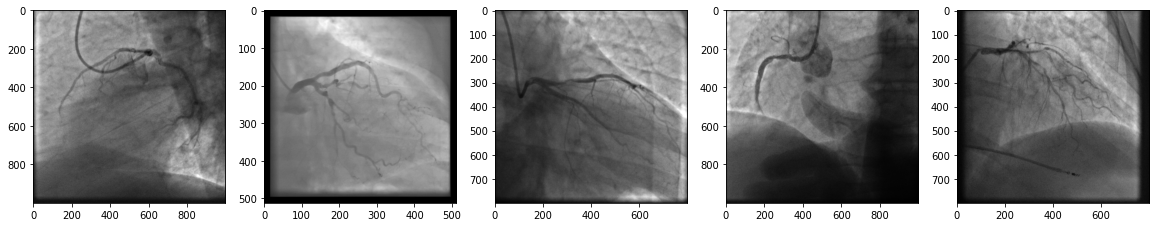

In [5]:
plt.figure(figsize=(20,20))

for i in range(5):
    file_name = random.choice(os.listdir(input_data_path))
    data_image_path= os.path.join(input_data_path, file_name)
    image=mpimg.imread(data_image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

## Split Dataset

In [6]:
splitfolders.ratio(split_data_path, output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 8325 files [00:39, 211.38 files/s]


## Image Augmentation

## Dataset Labels for train and test set

In [ ]:
# Create machine learning model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator